### Cannonical import

In [1]:
import sys
sys.path.append('/home/philippe/code/plussou/runinlyon')

%load_ext autoreload
%autoreload 2 

In [3]:
from runinlyon.running import get_full_ranking, get_bib_results

In [4]:
import pandas as pd
import numpy as np
import re

from selenium import webdriver
from selenium.webdriver.firefox.options import Options

import geckodriver_autoinstaller
geckodriver_autoinstaller.install()
options = Options()
options.headless = True

In [4]:
import logging

logging.basicConfig(filename='runinlyon.log', encoding='utf-8', level=logging.INFO)

# create logger
logger = logging.getLogger('runin_run')
logger.setLevel(logging.DEBUG)

# create file handler which logs even debug messages
fh = logging.FileHandler('runnin.log')
fh.setLevel(logging.DEBUG)

logger.addHandler(fh)

# 1. Getting the data 

## 1.1 Getting the full ranking for a specific event
### Call get_full_ranking function

In [ ]:
event_base = 'RunInLyon2014'
event_specific = 'Running | 21.100 KM'
nb_results = 9200

In [5]:
event_base = 'RunInLyon2015'
event_specific = 'Running | 21.100 KM'
nb_results = 10165

In [ ]:
event_base = 'RunInLyon2017'
event_specific = 'Running | 21.100 KM'
nb_results = 11174

In [12]:
event_base = 'RunInLyon2019'
event_specific = 'Running | Semi-Marathon'
nb_results = 9498

In [14]:
url = f'https://resultscui.active.com/events/{event_base}'
event_df = get_full_ranking(url,event_specific,nb_results,logger,debbug=True)

INFO:runin_run:--- start get_full_ranking ---
INFO:runin_run:url    : https://resultscui.active.com/events/RunInLyon2019
INFO:runin_run:course : Running | Semi-Marathon
INFO:runin_run:!! mode test !!
INFO:runin_run:n_bib  : 5
INFO:runin_run:From menu       :Course :
INFO:runin_run:Selecting course:Running | Semi-Marathon
INFO:runin_run:ready to read 10 results
INFO:runin_run:return 10 rows result table


In [7]:
event_df

,bib,sex,age,time
rank,,,,
1,30025,M,23,01:05:01
2,30024,M,23,01:07:30
3,30102,M,30,01:07:31
4,30023,M,23,01:09:16
5,30021,M,27,01:09:24
6,30030,M,22,01:09:42
7,30022,M,23,01:11:51
8,30235,M,31,01:15:09
9,32954,M,42,01:15:12


In [10]:
event_df.to_csv('../data/runinlyon_2019_base.csv')

In [ ]:
<select name="resultYear" class="form-control" onchange="resultYearMenu(this)">
	    <option value="1998">1998</option> 
	    <option value="1999">1999</option>
	    <option value="2000">2000</option>
...
	    <option value="2019" selected="">2019</option>   
	    </select>
        
<select name="resultEvent" class="form-control" onchange="resultEventMenu(this)">
	    <option value="marathon" selected="">Vienna City Marathon</option>
	    <option value="halfmarathon">Half Marathon</option>
	    <option value="relay">Relay</option>
	    <option value="10k">Vienna 10K</option>
	      <option value="junior">Youth Race</option>
	      <option value="kids">Kids Race</option>  
	      <option value="homerun">Home Run</option> 
	    </select>

## Vienna : resultList

    <div class="panel-heading"> time</div>
    <div class="panel-body">
    <div class="list-group">
<a class="list-group-item">0:30-1:00</a>
	<a class="list-group-item">1:00-1:15</a>
	<a class="list-group-item">1:15-1:30</a>
	<a class="list-group-item">1:30-1:45</a>
	<a class="list-group-item">1:45-2:00</a>
	<a class="list-group-item">2:00-</a>

https://www.vienna-marathon.com/?lang=en&surl=cd162e16e318d263fd56d6261673fe72#goto-result

In [5]:
url = 'https://www.vienna-marathon.com/?lang=en&surl=cd162e16e318d263fd56d6261673fe72'
params = {}

driver = webdriver.Firefox(options=options)
driver.get(url)

In [6]:
year_select = driver.find_element_by_name('resultYear')
event_select = driver.find_element_by_name('resultEvent')

In [10]:
years = year_select.find_elements_by_tag_name('option')

In [13]:
len(years)

22

In [16]:
years[0].text

'1998'

In [25]:
results_page = driver.find_element_by_id('contentResultPage')

In [30]:
results_select = results_page.find_elements_by_css_selector('div.panel')

In [31]:
len(results_select)

3

In [38]:
for selector in results_select:
    label = selector.find_element_by_class_name('panel-heading').get_attribute('innerHTML').strip()
    print('-',label,'-',label.find('time'))
    if label.find('time')==0:
        list_group = selector.find_element_by_class_name('list-group')

- placing Woman - -1
- placing Men - -1
- time - 0


In [39]:
time_range_select = list_group.find_elements_by_tag_name('a')

In [40]:
len(time_range_select)

6

In [43]:
for time_range in time_range_select:
    href= time_range.get_attribute('href')
    print(href)

javascript:openResultList('?wantList=2019&mara=true&time=true&VM=2:00-3:00')
javascript:openResultList('?wantList=2019&mara=true&time=true&VM=3:00-3:30')
javascript:openResultList('?wantList=2019&mara=true&time=true&VM=3:30-4:00')
javascript:openResultList('?wantList=2019&mara=true&time=true&VM=4:00-4:30')
javascript:openResultList('?wantList=2019&mara=true&time=true&VM=4:30-5:00')
javascript:openResultList('?wantList=2019&mara=true&time=true&VM=5:00-7:00')


In [44]:
driver.execute_script("arguments[0].click();", time_range_select[0])

In [ ]:
back_menu = results_page.find 'list_group'

In [83]:
tables = results_page.find_elements_by_tag_name('table')

In [84]:
len(tables)

207

In [86]:
sub_tables = []
data=[]
for table in tables:
    subt = table.find_elements_by_tag_name('table')
    if len(subt):
        sub_tables.append(subt[0])
    else:
        rows = table.find_elements_by_tag_name('tr')
        for row in rows:
            data.append([])
            cols=row.find_elements_by_tag_name('td')
            for col in cols:
                cell = col.text
                data[-1].append(cell)        

In [78]:
len(sub_tables)

1

In [65]:
import pandas as pd

In [87]:
data_df = pd.DataFrame(data)
data_df

,0,1,2,3,4,5,6,7,8,9,10
0,None,None,None,None,None,None,None,None,None,None,None
1,01:03:22,01:03:35,00:14:56,00:14:57,00:14:48,00:15:23,00:15:06,00:15:27,00:15:25,00:14:37,00:06:22
2,01:03:22,01:04:02,00:14:56,00:14:57,00:14:50,00:15:21,00:15:06,00:15:27,00:15:24,00:14:51,00:06:35
3,01:03:22,01:05:03,00:14:56,00:14:58,00:14:51,00:15:19,00:15:07,00:15:27,00:15:24,00:15:22,00:07:04
4,01:03:23,01:05:39,00:14:57,00:14:57,00:14:50,00:15:22,00:15:05,00:15:27,00:15:26,00:15:55,00:07:06
...,...,...,...,...,...,...,...,...,...,...,...
201,01:29:06,01:30:40,00:20:58,00:21:10,00:20:53,00:21:26,00:21:08,00:21:20,00:21:47,00:21:48,00:09:18
202,01:28:04,01:31:44,00:20:36,00:20:42,00:20:45,00:21:25,00:20:57,00:22:10,00:22:01,00:21:56,00:09:20
203,01:29:58,01:29:51,00:21:51,00:21:12,00:20:48,00:21:32,00:20:57,00:21:03,00:21:22,00:21:38,00:09:30
204,01:26:05,01:33:52,00:20:14,00:20:26,00:20:05,00:20:55,00:20:25,00:20:54,00:22:01,00:24:14,00:10:46


In [89]:
data_sub=[]
rows = sub_tables[0].find_elements_by_tag_name('tr')
for row in rows:
    data_sub.append([])
    cols=row.find_elements_by_tag_name('td')
    for col in cols:
        cell = col.text
        data_sub[-1].append(cell)

In [90]:
data_sub_df = pd.DataFrame(data_sub)
data_sub_df

""
0


In [93]:
data_df.columns=sub_tables[0].text.split()

In [94]:
data_df

,1.HM,2.HM,0-5km,5-10km,10-15km,15-20km,20-25km,25-30km,30-35km,35-40km,40-42km
0,None,None,None,None,None,None,None,None,None,None,None
1,01:03:22,01:03:35,00:14:56,00:14:57,00:14:48,00:15:23,00:15:06,00:15:27,00:15:25,00:14:37,00:06:22
2,01:03:22,01:04:02,00:14:56,00:14:57,00:14:50,00:15:21,00:15:06,00:15:27,00:15:24,00:14:51,00:06:35
3,01:03:22,01:05:03,00:14:56,00:14:58,00:14:51,00:15:19,00:15:07,00:15:27,00:15:24,00:15:22,00:07:04
4,01:03:23,01:05:39,00:14:57,00:14:57,00:14:50,00:15:22,00:15:05,00:15:27,00:15:26,00:15:55,00:07:06
...,...,...,...,...,...,...,...,...,...,...,...
201,01:29:06,01:30:40,00:20:58,00:21:10,00:20:53,00:21:26,00:21:08,00:21:20,00:21:47,00:21:48,00:09:18
202,01:28:04,01:31:44,00:20:36,00:20:42,00:20:45,00:21:25,00:20:57,00:22:10,00:22:01,00:21:56,00:09:20
203,01:29:58,01:29:51,00:21:51,00:21:12,00:20:48,00:21:32,00:20:57,00:21:03,00:21:22,00:21:38,00:09:30
204,01:26:05,01:33:52,00:20:14,00:20:26,00:20:05,00:20:55,00:20:25,00:20:54,00:22:01,00:24:14,00:10:46


In [108]:
data_df['42k']=pd.to_timedelta(data_df[ '5-10km'])+pd.to_timedelta(data_df['10-15km'])+pd.to_timedelta(data_df['15-20km'])+pd.to_timedelta(data_df['20-25km'])\
              +pd.to_timedelta(data_df['25-30km'])+pd.to_timedelta(data_df['30-35km'])+pd.to_timedelta(data_df['35-40km'])+pd.to_timedelta(data_df['40-42km'])

In [110]:
data_df['42k']=pd.to_timedelta(data_df[ '1.HM'])+pd.to_timedelta(data_df['2.HM'])

In [111]:
data_df

,1.HM,2.HM,0-5km,5-10km,10-15km,15-20km,20-25km,25-30km,30-35km,35-40km,40-42km,42k
0,None,None,None,None,None,None,None,None,None,None,None,NaT
1,01:03:22,01:03:35,00:14:56,00:14:57,00:14:48,00:15:23,00:15:06,00:15:27,00:15:25,00:14:37,00:06:22,0 days 02:06:57
2,01:03:22,01:04:02,00:14:56,00:14:57,00:14:50,00:15:21,00:15:06,00:15:27,00:15:24,00:14:51,00:06:35,0 days 02:07:24
3,01:03:22,01:05:03,00:14:56,00:14:58,00:14:51,00:15:19,00:15:07,00:15:27,00:15:24,00:15:22,00:07:04,0 days 02:08:25
4,01:03:23,01:05:39,00:14:57,00:14:57,00:14:50,00:15:22,00:15:05,00:15:27,00:15:26,00:15:55,00:07:06,0 days 02:09:02
...,...,...,...,...,...,...,...,...,...,...,...,...
201,01:29:06,01:30:40,00:20:58,00:21:10,00:20:53,00:21:26,00:21:08,00:21:20,00:21:47,00:21:48,00:09:18,0 days 02:59:46
202,01:28:04,01:31:44,00:20:36,00:20:42,00:20:45,00:21:25,00:20:57,00:22:10,00:22:01,00:21:56,00:09:20,0 days 02:59:48
203,01:29:58,01:29:51,00:21:51,00:21:12,00:20:48,00:21:32,00:20:57,00:21:03,00:21:22,00:21:38,00:09:30,0 days 02:59:49
204,01:26:05,01:33:52,00:20:14,00:20:26,00:20:05,00:20:55,00:20:25,00:20:54,00:22:01,00:24:14,00:10:46,0 days 02:59:57


In [ ]:
driver.close()

## 1.2 Getting detailed results  for all participants

In [28]:
df=pd.read_csv('../data/runinlyon_2019_base.csv',index_col='rank')

In [29]:
df['gun_time'] = pd.Series(np.zeros(len(df)))
df['5k_time'] = pd.Series(np.zeros(len(df)))
df['10k_time'] = pd.Series(np.zeros(len(df)))

In [31]:
event_base = 'RunInLyon2019'
url = f'https://resultscui.active.com/events/{event_base}'

driver = webdriver.Firefox(options=options)
driver.get(url)

In [32]:
## --- filling base table with detailed results
i_i=9001
i_f=-1
i=i_i
for bib in df.bib[i_i:i_f]:
    bib_str=str(bib).replace('.0','').strip()
    driver, results = get_bib_results(driver,bib_str)
    if len(results)==3:
        df.loc[i,['gun_time','5k_time','10k_time']]=results
    i+=1

In [58]:
df.to_csv('../data/runinlyon_2019_full.csv')

In [ ]:
##--- pour mémoire
df.loc[3:5].to_csv('toto.txt',mode='a',index=False, header=False)

In [62]:
driver.close()

## 1.3 dealing with missing values

In [59]:
df=pd.read_csv('../data/runinlyon_2019_full.csv',index_col='rank')

In [68]:
w = pd.to_timedelta(df['gun_time'],errors='coerce')
w.fillna(pd.Timedelta(seconds=0),inplace=True)
missed_bib = df[w<pd.Timedelta(seconds=1)].index
missed_bib

Int64Index([], dtype='int64', name='rank')

In [63]:
event_base = 'RunInLyon2019'
url = f'https://resultscui.active.com/events/{event_base}'

driver = webdriver.Firefox(options=options)
driver.get(url)

In [67]:
## --- filling missing values
for i in missed_bib:
    bib_str= str(df.loc[i,'bib']).replace('.0','').strip()
    driver, results = get_bib_results(driver,bib_str)
    if len(results)==3:
        df.loc[i,['gun_time','5k_time','10k_time']]=results

In [70]:
df.to_csv('../data/runinlyon_2019_full.csv')

# 2. Viewing the data

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df1=pd.read_csv('../data/runinlyon_2014_full.csv',index_col='rank')
df2=pd.read_csv('../data/runinlyon_2019_full.csv',index_col='rank')

In [9]:
df1['minutes'] = pd.to_timedelta(df1['time']).dt.seconds//60
df1['gun_minutes'] = pd.to_timedelta(df1['gun_time']).dt.seconds//60

In [10]:
df1['10k_minutes'] = pd.to_timedelta(df1['10k_time'],errors='coerce').dt.seconds//60
df1['10k_minutes'].fillna(df1['10k_minutes'].mean(),inplace=True)

In [11]:
df1['5k_minutes'] = pd.to_timedelta(df1['5k_time'],errors='coerce').dt.seconds//60
df1['5k_minutes'].fillna(df1['5k_minutes'].mean(),inplace=True)

In [12]:
df1['chip_gun'] = df1['gun_minutes']-df1['minutes']

In [13]:
df1['gate10k'] = df1['gun_minutes'] - df1['minutes'] + df1['10k_minutes']
df1['gate5k'] = df1['gun_minutes'] - df1['minutes'] + df1['5k_minutes']

In [14]:
flow_start = df1[['bib', 'chip_gun']].groupby('chip_gun').count()
flow_5k = df1[['bib','gate5k']].groupby('gate5k').count()
flow_10k = df1[['bib','gate10k']].groupby('gate10k').count()
flow_finish = df1[['bib', 'gun_minutes']].groupby('gun_minutes').count()

(0.0, 200.0)

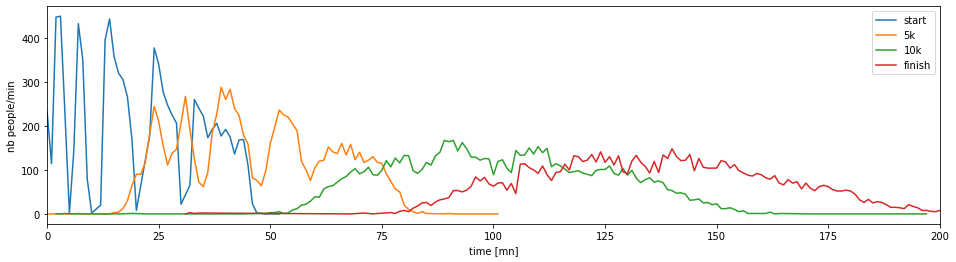

In [15]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(16,4))
ax.plot(flow_start,label='start')
ax.plot(flow_5k,label='5k')
ax.plot(flow_10k,label='10k')
ax.plot(flow_finish,label='finish')
ax.set_xlabel('time [mn]')
ax.set_ylabel('nb people/min')
ax.legend()
ax.set_xlim([0,200])

In [16]:
fig.savefig('flow.jpg')

In [17]:
!pwd

/home/philippe/code/plussou/runinlyon/notebooks


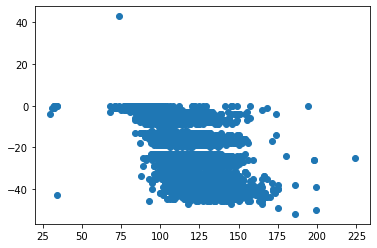

In [22]:
plt.scatter('minutes','chip_gun',data=df1)

<AxesSubplot:xlabel='chip_gun', ylabel='Count'>

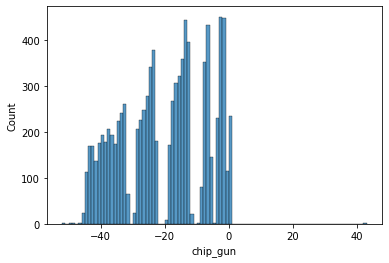

In [31]:
sns.histplot(df1['chip_gun'],binwidth=1)

In [79]:
df2['minutes'] = pd.to_timedelta(df2['time']).dt.seconds//60

<AxesSubplot:xlabel='minutes', ylabel='Density'>

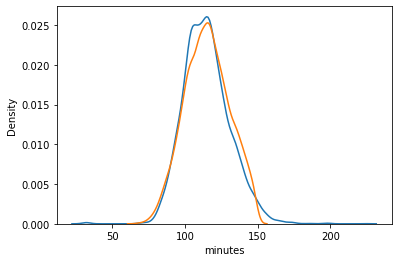

In [80]:
fig,ax=plt.subplots(nrows=1,ncols=1)
sns.kdeplot(df1['minutes'],ax=ax)
sns.kdeplot(df2['minutes'],ax=ax)